In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

from datetime import datetime
from dateutil.parser import parse

In [2]:
# import Zopa data for analysis 
LC_Data = pd.read_csv('data_for_loanbook_extract_2020-04-01.csv', low_memory=False)

# Data Pre-Processing

In [3]:
#print data shape
print(LC_Data.shape)

(734079, 14)


In [4]:
#print data head
LC_Data.head()

,Snapshot Date,Encrypted Loan ID,Encrypted Borrower ID,Disbursal date,Original Loan Amount,Principal Collected,Interest Collected,Total number of payments,Last payment date,Term,Lending rate,Latest Status,Date of Default,PostCode
0,01/04/2020,KiNr6fWbDJawb+iWDqxa5Z0ujFJY0SdvrNcnx6ohotjTmh...,K9/BbjsErCJgqotvqUKWD/Rnpb+f9QsOdxZIT17NjWpW3i...,31/01/2006,9000.0,9000.0,679.560000,36,05/02/2009,36,0.0491,Completed,NaN,NaN
1,01/04/2020,KEG5ZcmNwkBdev/wAbhXY3k/jTzMEsD5oGgthuwDk3KAhI...,KCZ0hABCC6lkGViMDi6V+UE/jTzMEsD5oGgthuwDk3KAhI...,01/12/2009,12120.0,12120.0,1433.160000,37,11/12/2012,36,0.0872,Completed,NaN,DG13
2,01/04/2020,K/eXt8OTkQr+K+q7hB7NwfE/jTzMEsD5oGgthuwDk3KAhI...,Kbzjqk1XQcW30KMO5xaeQD0/jTzMEsD5oGgthuwDk3KAhI...,12/01/2010,3120.0,3120.0,351.840000,36,23/08/2012,36,0.0786,Completed,NaN,NaN
3,01/04/2020,KHAjSlBZP8dfKKSvZ1P0RoE/jTzMEsD5oGgthuwDk3KAhI...,KpImAAXOHamrMyTha6zoo18XjNjekFAKeIog8thsa/dMhI...,17/11/2009,1120.0,1120.0,141.550000,21,17/08/2011,36,0.1007,Completed,NaN,HP19
4,01/04/2020,Ka/qq6opoNm3Ru0g4tZ60kU/jTzMEsD5oGgthuwDk3KAhI...,KDAVgrkygXXP76b4gAYvv3k/jTzMEsD5oGgthuwDk3KAhI...,22/12/2009,10120.0,10120.0,1333.989778,18,17/06/2011,60,0.1062,Completed,NaN,ST3


In [5]:
##print total column list 
LC_Data.columns.tolist()

['Snapshot Date',
 'Encrypted Loan ID',
 'Encrypted Borrower ID',
 'Disbursal date',
 'Original Loan Amount',
 'Principal Collected',
 'Interest Collected',
 'Total number of payments',
 'Last payment date',
 'Term',
 'Lending rate',
 'Latest Status',
 'Date of Default',
 'PostCode']

In [6]:
LC_Data_Updated = LC_Data.loc[:, LC_Data.isnull().sum() < 0.5*LC_Data.shape[0]]
#Dropping all columns with 50% missing values

In [7]:
#print data shape
print(LC_Data_Updated.shape)

(734079, 13)


In [8]:
#print data head
LC_Data_Updated.head()

,Snapshot Date,Encrypted Loan ID,Encrypted Borrower ID,Disbursal date,Original Loan Amount,Principal Collected,Interest Collected,Total number of payments,Last payment date,Term,Lending rate,Latest Status,PostCode
0,01/04/2020,KiNr6fWbDJawb+iWDqxa5Z0ujFJY0SdvrNcnx6ohotjTmh...,K9/BbjsErCJgqotvqUKWD/Rnpb+f9QsOdxZIT17NjWpW3i...,31/01/2006,9000.0,9000.0,679.560000,36,05/02/2009,36,0.0491,Completed,NaN
1,01/04/2020,KEG5ZcmNwkBdev/wAbhXY3k/jTzMEsD5oGgthuwDk3KAhI...,KCZ0hABCC6lkGViMDi6V+UE/jTzMEsD5oGgthuwDk3KAhI...,01/12/2009,12120.0,12120.0,1433.160000,37,11/12/2012,36,0.0872,Completed,DG13
2,01/04/2020,K/eXt8OTkQr+K+q7hB7NwfE/jTzMEsD5oGgthuwDk3KAhI...,Kbzjqk1XQcW30KMO5xaeQD0/jTzMEsD5oGgthuwDk3KAhI...,12/01/2010,3120.0,3120.0,351.840000,36,23/08/2012,36,0.0786,Completed,NaN
3,01/04/2020,KHAjSlBZP8dfKKSvZ1P0RoE/jTzMEsD5oGgthuwDk3KAhI...,KpImAAXOHamrMyTha6zoo18XjNjekFAKeIog8thsa/dMhI...,17/11/2009,1120.0,1120.0,141.550000,21,17/08/2011,36,0.1007,Completed,HP19
4,01/04/2020,Ka/qq6opoNm3Ru0g4tZ60kU/jTzMEsD5oGgthuwDk3KAhI...,KDAVgrkygXXP76b4gAYvv3k/jTzMEsD5oGgthuwDk3KAhI...,22/12/2009,10120.0,10120.0,1333.989778,18,17/06/2011,60,0.1062,Completed,ST3


In [9]:
#renaming column name
LC_Data_Updated = LC_Data_Updated.rename(columns={'Snapshot Date':'Snap Date','Encrypted Loan ID':'Loan ID','Encrypted Borrower ID': 'Borowwer ID', 'Disbursal date': 'Date', 'Original Loan Amount': 'Loan Amount', 'Principal Collected': 'Principal Amount', 'Interest Collected': 'Interest Amount', 'Total number of payments': 'Number_Of_Payment', 'Last payment date':'Last_Payment_Date', 'Term': 'Term', 'Lending rate': 'Interest Rate', 'Latest Status': 'Status', 'Date of Default': 'Date_of_Default', 'PostCode': 'Post_Code'})

In [10]:
#print total column list 
LC_Data_Updated.columns.tolist()

['Snap Date',
 'Loan ID',
 'Borowwer ID',
 'Date',
 'Loan Amount',
 'Principal Amount',
 'Interest Amount',
 'Number_Of_Payment',
 'Last_Payment_Date',
 'Term',
 'Interest Rate',
 'Status',
 'Post_Code']

In [11]:
#Target Column is Status
LC_Data_Updated.Status.value_counts()

Completed    416772
Active       257302
Default       37533
Late          22472
Name: Status, dtype: int64

In [12]:
# Dropping unrequired rows from target column
LC_Data_Updated = LC_Data_Updated[LC_Data_Updated.Status != 'Active']

In [13]:
LC_Data_Updated.Status.value_counts()

Completed    416772
Default       37533
Late          22472
Name: Status, dtype: int64

In [14]:
#Rename target variable and classified it into binary
LC_Data_Updated['Credit_Score'] = np.where(LC_Data_Updated.loc[:, 'Status'].isin(['Late', 'Default']), 0, 1)

In [15]:
#value counts after categorization of  target variable 
LC_Data_Updated.Credit_Score.value_counts()

1    416772
0     60005
Name: Credit_Score, dtype: int64

In [16]:
#Dropping the Orgininal loan_status column since we already converted the target function to binary
LC_Data_Updated.drop(columns = ['Status'], inplace = True)

In [17]:
#Analyzing Predictive Column
len(LC_Data_Updated.columns)

13

In [18]:
#creation of a list in order to store the columns that will retian as categorical or numerical
#------------------------------------------------------------------------
Categorical_Features=[]
Numerical_Features=[]

In [19]:
##print number of column with different set attributes 
LC_Data_Updated

,Snap Date,Loan ID,Borowwer ID,Date,Loan Amount,Principal Amount,Interest Amount,Number_Of_Payment,Last_Payment_Date,Term,Interest Rate,Post_Code,Credit_Score
0,01/04/2020,KiNr6fWbDJawb+iWDqxa5Z0ujFJY0SdvrNcnx6ohotjTmh...,K9/BbjsErCJgqotvqUKWD/Rnpb+f9QsOdxZIT17NjWpW3i...,31/01/2006,9000.0,9000.000000,679.560000,36,05/02/2009,36,0.0491,NaN,1
1,01/04/2020,KEG5ZcmNwkBdev/wAbhXY3k/jTzMEsD5oGgthuwDk3KAhI...,KCZ0hABCC6lkGViMDi6V+UE/jTzMEsD5oGgthuwDk3KAhI...,01/12/2009,12120.0,12120.000000,1433.160000,37,11/12/2012,36,0.0872,DG13,1
2,01/04/2020,K/eXt8OTkQr+K+q7hB7NwfE/jTzMEsD5oGgthuwDk3KAhI...,Kbzjqk1XQcW30KMO5xaeQD0/jTzMEsD5oGgthuwDk3KAhI...,12/01/2010,3120.0,3120.000000,351.840000,36,23/08/2012,36,0.0786,NaN,1
3,01/04/2020,KHAjSlBZP8dfKKSvZ1P0RoE/jTzMEsD5oGgthuwDk3KAhI...,KpImAAXOHamrMyTha6zoo18XjNjekFAKeIog8thsa/dMhI...,17/11/2009,1120.0,1120.000000,141.550000,21,17/08/2011,36,0.1007,HP19,1
4,01/04/2020,Ka/qq6opoNm3Ru0g4tZ60kU/jTzMEsD5oGgthuwDk3KAhI...,KDAVgrkygXXP76b4gAYvv3k/jTzMEsD5oGgthuwDk3KAhI...,22/12/2009,10120.0,10120.000000,1333.989778,18,17/06/2011,60,0.1062,ST3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
734074,01/04/2020,K+WtdLhUsyg5X/QWjeRha3+jz9Kzxom7RYfVd8+QeeAeFR...,KbHNPXjHDA/HpWe06ga16/GR2JtFQVCvNHNiiBhNP92aLY...,20/07/2016,1300.0,517.750089,71.529911,10,05/06/2017,24,0.0790,TS23,0
734075,01/04/2020,KIK0lRN432Ykyn4h+ZhMdcn6yMP40whh4JrRd9Fr1LmGl6...,KnjRiBcw6grVlZHW9rH4l6Uq1uiI3xobTG86Kw7NROUlWG...,11/01/2006,3000.0,3000.000000,225.430000,37,21/05/2009,36,0.0480,SS17,1
734076,01/04/2020,Ky90MqrXpKSfuJOzEFR5ZxnWHge6RnPgpjD/rmUxjYQuQr...,KaojDT3Yt74B7AWpYbyl0nrBen8pPpwUI4ZNLxbyez0puP...,09/03/2006,3000.0,3000.000000,213.000000,36,07/04/2009,36,0.0442,LU2,1
734077,01/04/2020,KH4x+f4TkZjjJywzrQJC/WFT/1xl9LX9/GZ13uYal76M3S...,KcW/2Bt/x7NxTXMt6DX1PCGR2JtFQVCvNHNiiBhNP92aLY...,12/08/2016,2000.0,2000.000000,171.110000,24,04/09/2018,24,0.0790,CT11,1


In [20]:
#Dropping Unrequired Columns
LC_Data_Updated.drop(columns = ['Snap Date','Loan ID','Borowwer ID','Date','Last_Payment_Date','Post_Code'], inplace = True)

In [21]:
#Add variable with respect to numerical and catagorical characteristic 
Numerical_Features.append('Loan Amount')
Numerical_Features.append('Principal Amount')
Numerical_Features.append('Interest Amount')
Numerical_Features.append('Number_Of_Payment')
Numerical_Features.append('Term')
Numerical_Features.append('Interest Rate')

In [22]:
#print data shape after chosing variable related to our analysis
print(LC_Data_Updated.shape)

(476777, 7)


In [23]:
#Check for Null Values
LC_Data_Updated.isna().sum()

Loan Amount          0
Principal Amount     0
Interest Amount      0
Number_Of_Payment    0
Term                 0
Interest Rate        0
Credit_Score         0
dtype: int64

In [24]:
##reset dataset
LC_Data_Updated.reset_index(inplace=True)

In [25]:
LC_Data_Updated = LC_Data_Updated.loc[:,LC_Data_Updated.apply(pd.Series.nunique) != 1]
#Print Columns with unique value

In [26]:
for col in LC_Data_Updated.columns:
    if (len(LC_Data_Updated[col].unique()) < 10):
        print(LC_Data_Updated[col].value_counts())
        print()
#Use to check whether any variable has binary rows and if one of the rows has less than 10% we drop that column

1    416772
0     60005
Name: Credit_Score, dtype: int64



In [27]:
#Data Frame for Numerical Data
#-----------------------------------------------------------------------------------------------------------------------------
Numerical_Data=pd.DataFrame()
for col in Numerical_Features:
    Numerical_Data=pd.concat([ Numerical_Data, LC_Data_Updated[col]], axis= 1)

Numerical_Data.head()

,Loan Amount,Principal Amount,Interest Amount,Number_Of_Payment,Term,Interest Rate
0,9000.0,9000.0,679.560000,36,36,0.0491
1,12120.0,12120.0,1433.160000,37,36,0.0872
2,3120.0,3120.0,351.840000,36,36,0.0786
3,1120.0,1120.0,141.550000,21,36,0.1007
4,10120.0,10120.0,1333.989778,18,60,0.1062


In [28]:
#Numerical Data Info
Numerical_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476777 entries, 0 to 476776
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Loan Amount        476777 non-null  float64
 1   Principal Amount   476777 non-null  float64
 2   Interest Amount    476777 non-null  float64
 3   Number_Of_Payment  476777 non-null  int64  
 4   Term               476777 non-null  int64  
 5   Interest Rate      476777 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 25.5+ MB


In [29]:
#convert all into float
for col in Numerical_Data.columns:
    Numerical_Data[col].astype(float)

In [30]:
#print numerical data description 
Numerical_Data.describe()

,Loan Amount,Principal Amount,Interest Amount,Number_Of_Payment,Term,Interest Rate
count,476777.000000,476777.000000,476777.000000,476777.000000,476777.000000,476777.000000
mean,6446.544036,5741.735501,580.607948,20.557059,39.885062,0.094748
std,5152.041205,4935.731029,759.242810,14.298970,15.952087,0.061116
min,260.000000,0.000000,0.000000,0.000000,6.000000,0.010000
25%,2900.000000,2160.000000,136.960000,10.000000,24.000000,0.051300
50%,5050.000000,4220.000000,328.290000,18.000000,36.000000,0.074000
75%,8610.000000,7690.000000,710.210000,30.000000,60.000000,0.121900
max,35000.000000,35000.000000,13710.655610,276.000000,60.000000,0.337800


In [31]:
#Import Required Libraries
from sklearn.preprocessing import StandardScaler

In [32]:
##Scale numerical data set 
Scaler = StandardScaler()
Scaled_Numerical_Data = pd.DataFrame(Scaler.fit_transform(Numerical_Data),columns=Numerical_Data.columns)

In [33]:
#Merging Numerical and Categorical Data
Independent_Variable= Scaled_Numerical_Data
#------------------------------------------------------------------------------------------------------------------------------
Target_Variable=LC_Data_Updated.Credit_Score
print(Independent_Variable.shape, Target_Variable.shape)
Independent_Variable.head()

(476777, 6) (476777,)


,Loan Amount,Principal Amount,Interest Amount,Number_Of_Payment,Term,Interest Rate
0,0.495621,0.660139,0.130330,1.080005,-0.243546,-0.746915
1,1.101207,1.292265,1.122899,1.149940,-0.243546,-0.123510
2,-0.645676,-0.531175,-0.301311,1.080005,-0.243546,-0.264226
3,-1.033872,-0.936384,-0.578285,0.030977,-0.243546,0.097382
4,0.713011,0.887056,0.992282,-0.178828,1.260961,0.187374


<AxesSubplot:xlabel='Loan Amount', ylabel='count'>

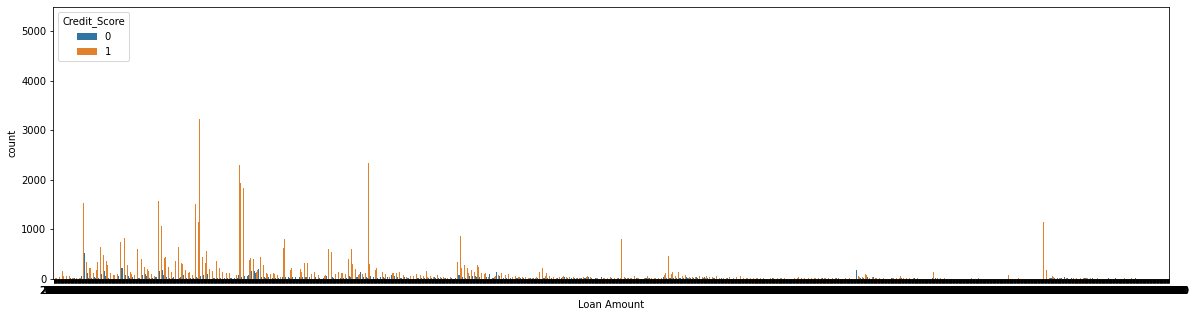

In [35]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'Loan Amount', hue = 'Credit_Score', data = LC_Data_Updated)

<AxesSubplot:xlabel='Principal Amount', ylabel='count'>

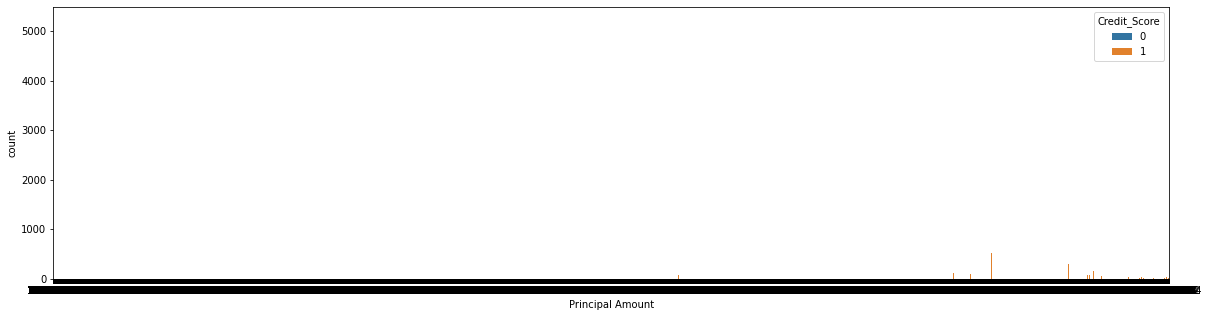

In [36]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'Principal Amount', hue = 'Credit_Score', data = LC_Data_Updated)

<AxesSubplot:xlabel='Number_Of_Payment', ylabel='count'>

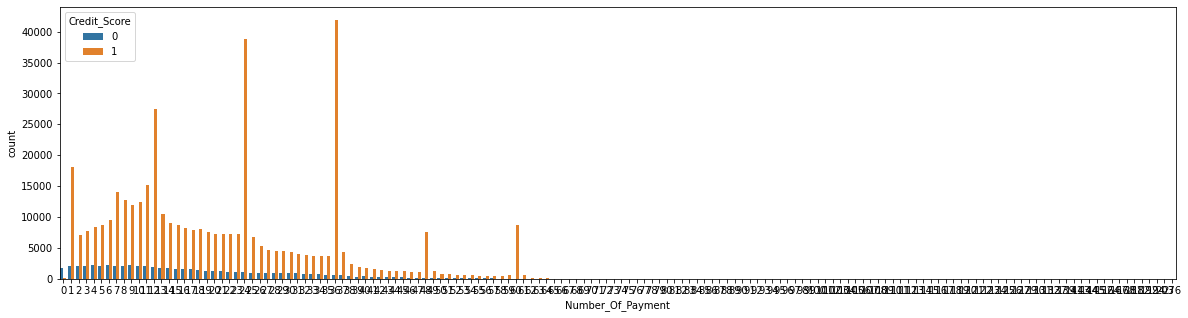

In [35]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'Number_Of_Payment', hue = 'Credit_Score', data = LC_Data_Updated)

<AxesSubplot:xlabel='Term', ylabel='count'>

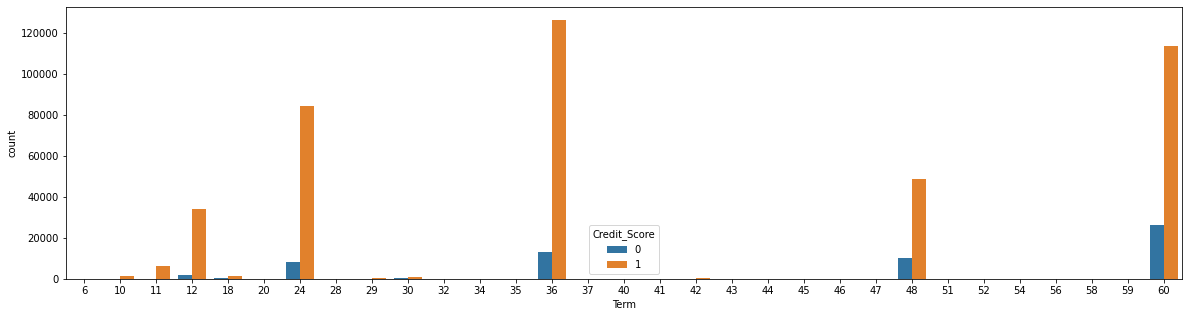

In [34]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'Term', hue = 'Credit_Score', data = LC_Data_Updated)

<AxesSubplot:xlabel='Interest Rate', ylabel='count'>

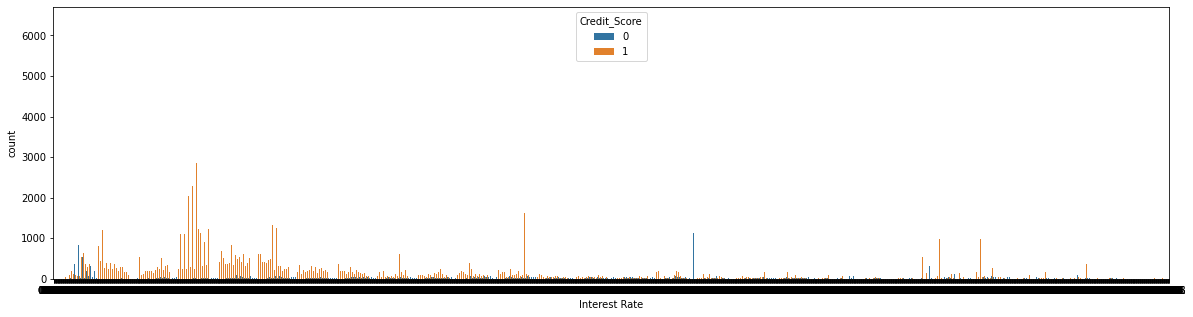

In [36]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'Interest Rate', hue = 'Credit_Score', data = LC_Data_Updated)

# Feature Engineering

In [34]:
#Import Required Library
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
#data ranking based on importance regarding target variable 
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(Independent_Variable, Target_Variable)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(Independent_Variable.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.513249)
2. feature 0 (0.217581)
3. feature 5 (0.095082)
4. feature 2 (0.088801)
5. feature 3 (0.045734)
6. feature 4 (0.039553)


In [36]:
##column name 
Independent_Variable.columns.tolist()

['Loan Amount',
 'Principal Amount',
 'Interest Amount',
 'Number_Of_Payment',
 'Term',
 'Interest Rate']

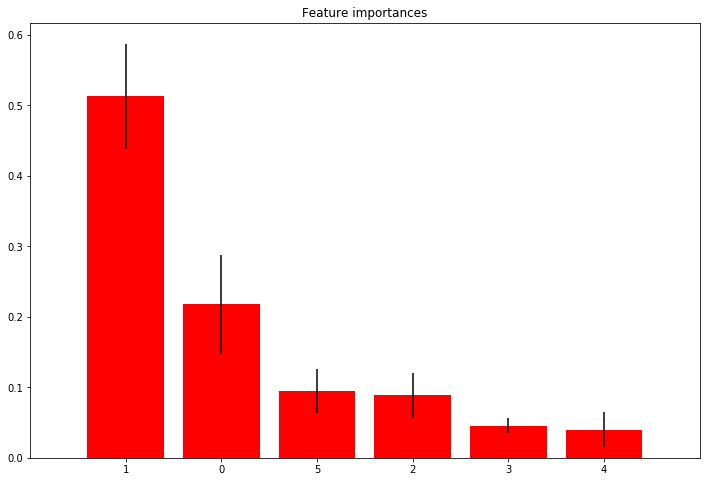

In [37]:
#figure to see importance of different variable  
plt.figure()
plt.title("Feature importances")
plt.bar(range(Independent_Variable.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Independent_Variable.shape[1]), indices)
plt.xlim([-1, Independent_Variable.shape[1]])
plt.show()

In [38]:
#feature 1 (0.513249): Loan Amount
#feature 0 (0.217581): Principal Amount
#feature 5 (0.095082): Interest Rate
#feature 2 (0.088801): Interest Amount
#feature 3 (0.045734): Number_Of_Payment
#feature 4 (0.039553): Term

# Correlation

In [39]:
#Correlation between 2 variables 
cor = Independent_Variable.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.50) | (cor < -0.50)]

Principal Amount  Loan Amount    0.872300
Interest Amount   Loan Amount    0.567137
Term              Loan Amount    0.507807
dtype: float64

In [40]:
#Drop Highly Correlated Column
Independent_Variable.drop(columns = ['Principal Amount'], inplace = True)

In [41]:
# method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
Correlation_Variables = Independent_Variable.corr(method='pearson')
Correlation_Variables.head()

,Loan Amount,Interest Amount,Number_Of_Payment,Term,Interest Rate
Loan Amount,1.000000,0.567137,0.075506,0.507807,-0.180220
Interest Amount,0.567137,1.000000,0.396482,0.416825,0.227195
Number_Of_Payment,0.075506,0.396482,1.000000,0.257237,-0.224858
Term,0.507807,0.416825,0.257237,1.000000,-0.086034
Interest Rate,-0.180220,0.227195,-0.224858,-0.086034,1.000000


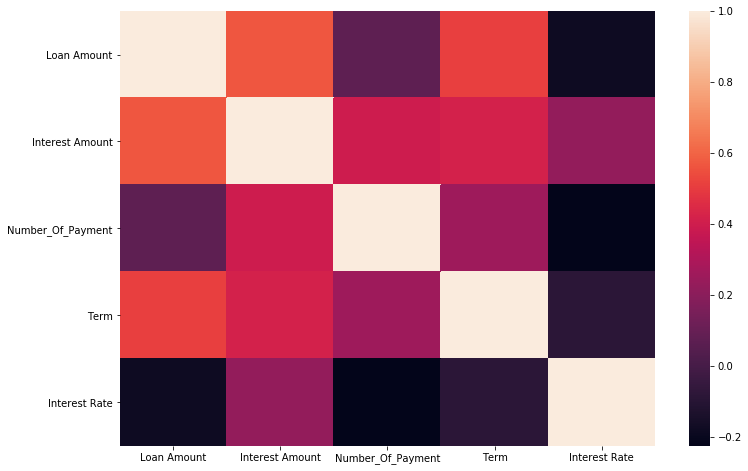

In [42]:
##coorelation metrix in graph 
sns.heatmap(Correlation_Variables) # Heat Map

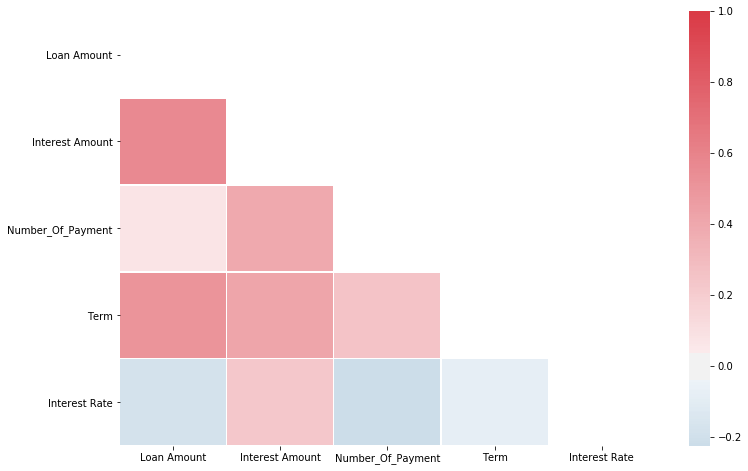

In [43]:
# Removing Top Right Triangle
mask = np.zeros_like(Correlation_Variables, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(Correlation_Variables, mask=mask, linewidths=.15, cmap=cmap, center=0)

In [44]:
#correlation with target variable 
Independent_Variable.corrwith(Target_Variable, axis = 0)

Loan Amount         -0.110543
Interest Amount     -0.210514
Number_Of_Payment    0.076064
Term                -0.146073
Interest Rate       -0.318295
dtype: float64

# Training and Test Data Split

In [45]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
import warnings

import itertools

from imblearn.over_sampling import SMOTE

In [46]:
##split dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(Independent_Variable, Target_Variable, test_size=0.2, random_state=15)

In [47]:
##print train & test data shape 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(381421, 5) (381421,)
(95356, 5) (95356,)


# Undersampling

In [48]:
# describes info about train and test set 
print("Number of X_train data: ", X_train.shape) 
print("Number of y_train data: ", y_train.shape) 
print("Number of X_test data: ", X_test.shape) 
print("Number of y_test data: ", y_test.shape) 

Number of X_train data:  (381421, 5)
Number of y_train data:  (381421,)
Number of X_test data:  (95356, 5)
Number of y_test data:  (95356,)


In [49]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before UnderSampling, counts of label '1': 333351
Before UnderSampling, counts of label '0': 48070 



In [50]:
#Import Required Library
from imblearn.under_sampling import RandomUnderSampler

In [51]:
#undersampling 
rus = RandomUnderSampler(random_state= 42)
X_train_Undersample, y_train_Undersample = rus.fit_sample(X_train, y_train)

In [52]:
#print data set after undersampling 
print('After UnderSampling of data, the shape of train_X: {}'.format(X_train_Undersample.shape)) 
print('After UnderSampling of data, the shape of train_y: {} \n'.format(y_train_Undersample.shape)) 
  
print("After UnderSampling of data, counts of label '1': {}".format(sum(y_train_Undersample == 1))) 
print("After UnderSampling of data, counts of label '0': {}".format(sum(y_train_Undersample == 0)))

After UnderSampling of data, the shape of train_X: (96140, 5)
After UnderSampling of data, the shape of train_y: (96140,) 

After UnderSampling of data, counts of label '1': 48070
After UnderSampling of data, counts of label '0': 48070


# Evaluation Metrics

In [53]:
#Import Required Libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [54]:
#Confusion Matrics
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [55]:
from numpy import mean
from numpy import std
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model

# Classification Models

# Decision Tree

In [56]:
clf_tree = DecisionTreeClassifier()

In [57]:
clf_tree.fit(X_train_Undersample, y_train_Undersample)

DecisionTreeClassifier()

In [58]:
y_pred_tree = clf_tree.predict_proba(X_test)[:,1]

In [59]:
print(classification_report(y_test, y_pred_tree.round())) 

              precision    recall  f1-score   support

           0       0.28      0.72      0.40     11935
           1       0.95      0.73      0.83     83421

    accuracy                           0.73     95356
   macro avg       0.61      0.73      0.62     95356
weighted avg       0.87      0.73      0.77     95356



Confusion matrix, without normalization
[[ 8645  3290]
 [22238 61183]]


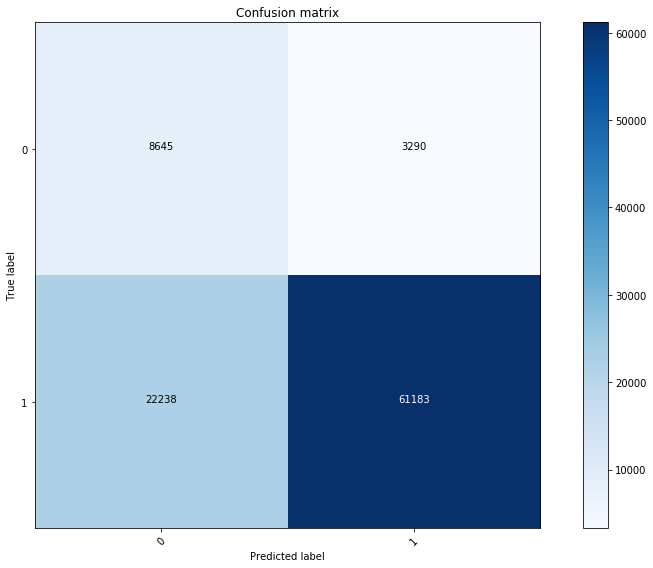

In [60]:
cnf_matrix = confusion_matrix(y_test, y_pred_tree.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [61]:
# Creating true and false positive rates
false_positive_rate_tree, true_positive_rate_tree, threshold_tree = roc_curve(y_test, y_pred_tree)

In [62]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred_tree))

roc_auc_score for DecisionTree:  0.7287362267998381


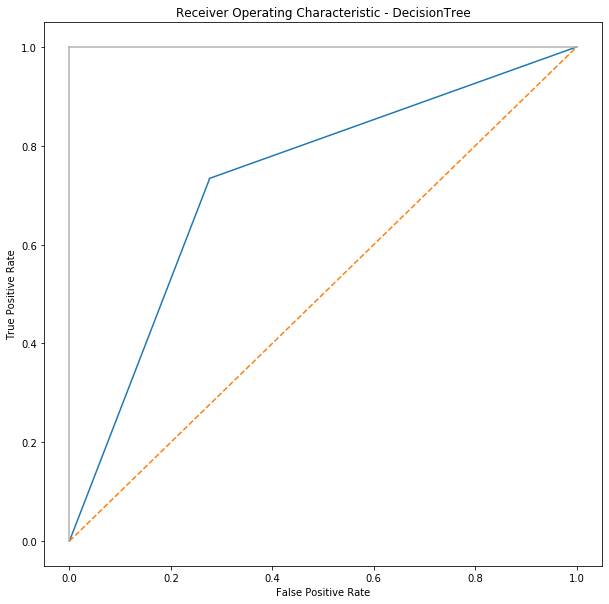

In [63]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate_tree, true_positive_rate_tree)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
scores = cross_val_score(clf_tree, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.729 (0.006)


# Logistic Regression

In [65]:
clf_reg = LogisticRegression()

In [66]:
clf_reg.fit(X_train_Undersample, y_train_Undersample)

LogisticRegression()

In [67]:
y_pred_reg = clf_reg.predict_proba(X_test)[:,1]

In [68]:
print(classification_report(y_test, y_pred_reg.round())) 

              precision    recall  f1-score   support

           0       0.29      0.69      0.41     11935
           1       0.95      0.76      0.84     83421

    accuracy                           0.75     95356
   macro avg       0.62      0.73      0.63     95356
weighted avg       0.86      0.75      0.79     95356



Confusion matrix, without normalization
[[ 8277  3658]
 [19968 63453]]


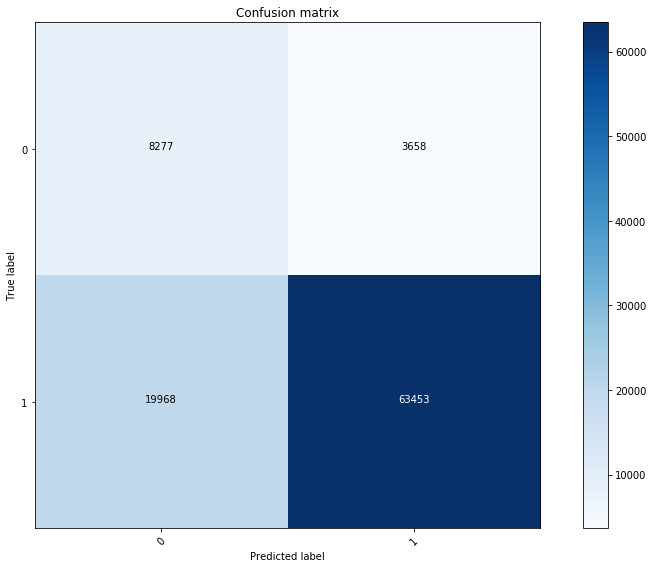

In [69]:
cnf_matrix = confusion_matrix(y_test, y_pred_reg.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [70]:
# Creating true and false positive rates
false_positive_rate_reg, true_positive_rate_reg, threshold_reg = roc_curve(y_test, y_pred_reg)

In [71]:
print('roc_auc_score for LogisticRegression: ', roc_auc_score(y_test, y_pred_reg))

roc_auc_score for LogisticRegression:  0.7988904137028825


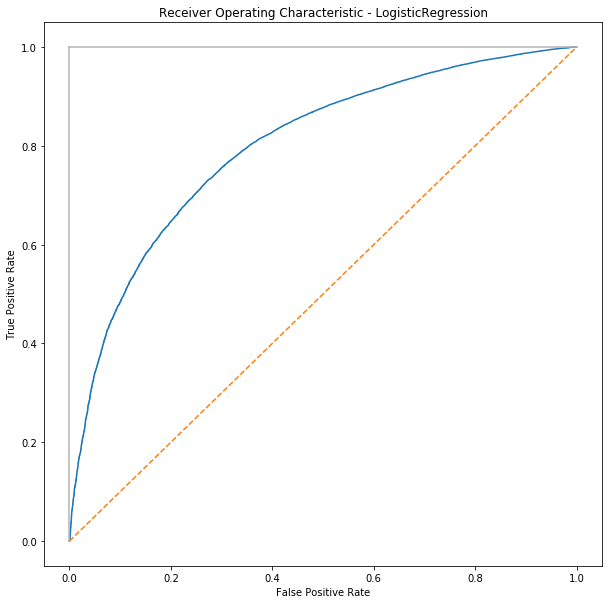

In [72]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LogisticRegression')
plt.plot(false_positive_rate_reg, true_positive_rate_reg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
scores = cross_val_score(clf_reg, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.728 (0.002)


# Naive Bayes

In [74]:
clf_NB = GaussianNB()

In [75]:
clf_NB.fit(X_train_Undersample, y_train_Undersample)

GaussianNB()

In [76]:
y_pred_NB = clf_NB.predict_proba(X_test)[:,1]

In [77]:
print(classification_report(y_test, y_pred_NB.round())) 

              precision    recall  f1-score   support

           0       0.31      0.57      0.40     11935
           1       0.93      0.82      0.87     83421

    accuracy                           0.79     95356
   macro avg       0.62      0.70      0.64     95356
weighted avg       0.85      0.79      0.81     95356



Confusion matrix, without normalization
[[ 6814  5121]
 [14928 68493]]


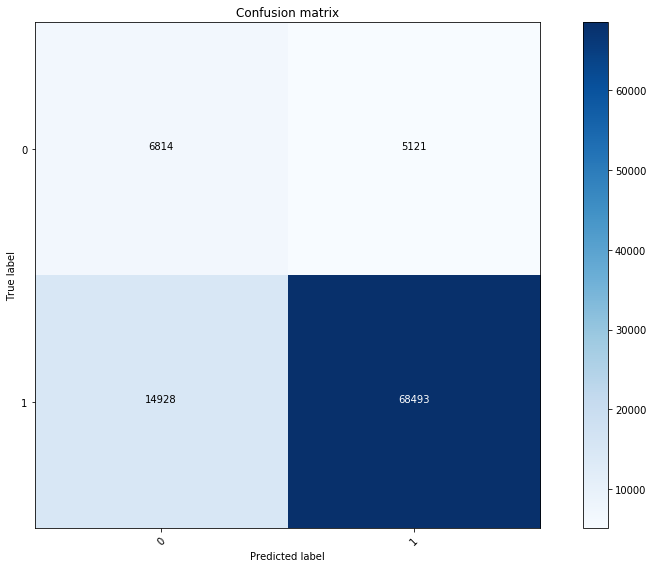

In [78]:
cnf_matrix = confusion_matrix(y_test, y_pred_NB.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [79]:
# Creating true and false positive rates
false_positive_rate_NB, true_positive_rate_NB, threshold_NB = roc_curve(y_test, y_pred_NB)

In [80]:
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_pred_NB))

roc_auc_score for Naive Bayes:  0.7843408347321843


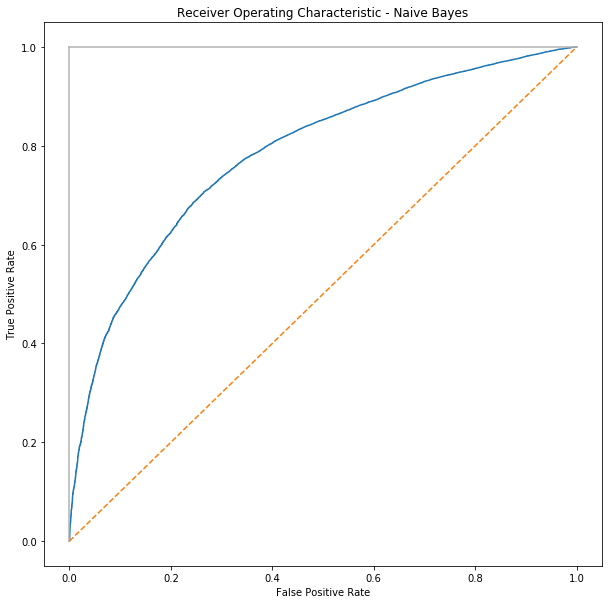

In [81]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate_NB, true_positive_rate_NB)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
scores = cross_val_score(clf_NB, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.696 (0.005)


# RandomForestClassifier

In [83]:
clf_rf = RandomForestClassifier()

In [84]:
clf_rf.fit(X_train_Undersample, y_train_Undersample)

RandomForestClassifier()

In [85]:
y_pred_rf = clf_rf.predict_proba(X_test)[:,1]

Confusion matrix, without normalization
[[ 9699  2236]
 [20076 63345]]


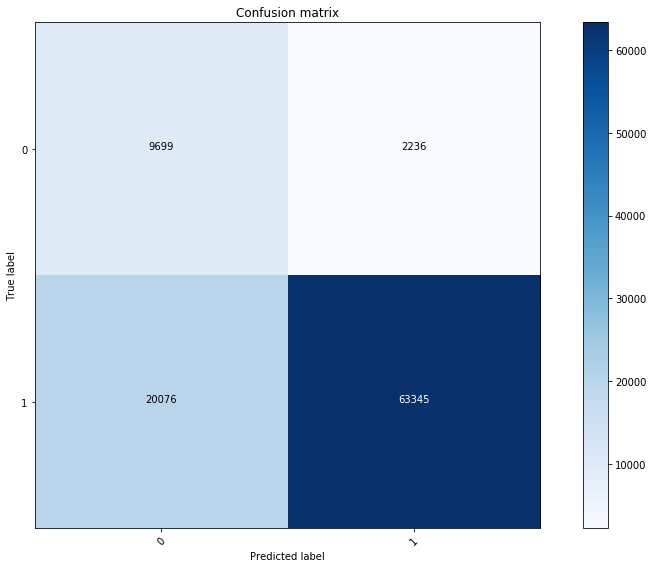

In [86]:
cnf_matrix = confusion_matrix(y_test, y_pred_rf.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [87]:
# Creating true and false positive rates
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test, y_pred_rf)

In [88]:
print('roc_auc_score for RandomForestClassifier: ', roc_auc_score(y_test, y_pred_rf))

roc_auc_score for RandomForestClassifier:  0.8654087837592338


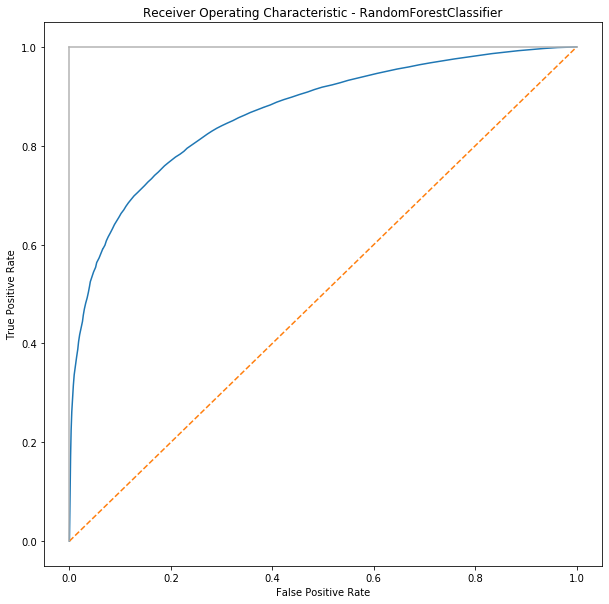

In [89]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
scores = cross_val_score(clf_rf, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.784 (0.004)


# Support Vector Machine

In [91]:
clf_svm = svm.SVC(random_state=123)

In [92]:
clf_svm.fit(X_train_Undersample, y_train_Undersample)

SVC(random_state=123)

In [93]:
y_pred_SVM= clf_svm.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred_SVM.round())) 

              precision    recall  f1-score   support

           0       0.31      0.75      0.44     11935
           1       0.95      0.76      0.85     83421

    accuracy                           0.76     95356
   macro avg       0.63      0.75      0.64     95356
weighted avg       0.87      0.76      0.80     95356



Confusion matrix, without normalization
[[ 8918  3017]
 [19998 63423]]


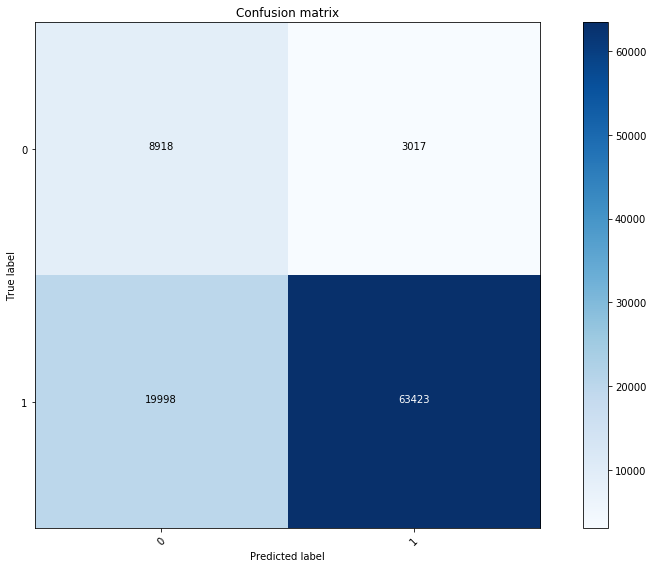

In [95]:
cnf_matrix = confusion_matrix(y_test, y_pred_SVM.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [96]:
# Creating true and false positive rates
false_positive_rate_SVM, true_positive_rate_SVM, threshold_SVM = roc_curve(y_test, y_pred_SVM)

In [97]:
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_pred_SVM))

roc_auc_score for SVM:  0.7537451328475172


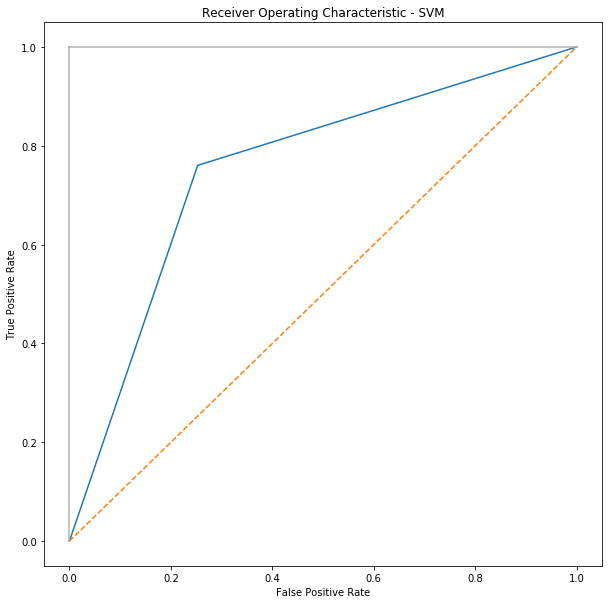

In [98]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate_SVM, true_positive_rate_SVM)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [99]:
scores = cross_val_score(clf_svm, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.754 (0.003)
